In [1]:
#Importing useful packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fitter

### Experiment 1

#### Data Collection

Checking Precision

In [3]:
iAngleP = np.array([30, 30, 30, 30, 30]) #incident angle (degrees)
rAngleP = np.array([31, 31, 30, 31, 30]) #reflected angle (degrees)
uncertainty = 0.5 #degrees +/-
print('Standard Deviation of Measurements: {:.4f}'.format(np.std(rAngleP, ddof = 1)))

Standard Deviation of Measurements: 0.5477


Conducting experiment

In [23]:
iAngle = np.array([8, 16, 24, 32, 40, 48, 56, 64, 72, 80]) #incident angle
rAngle = np.array([9, 16, 24, 33, 41, 49, 57, 64, 73, 80]) #reflected angle

#### Data Analysis

In [24]:
#Fitting Data
def f(x, a0, a1):
    return x*a0 + a1

par0 = np.array([1,0])

par, cov = fitter.curve_fit(f,iAngle,rAngle,par0)

a0 = par[0]
a1 = par[1]

x = np.linspace(iAngle[0], iAngle[-1], 100)

Fitted Linear Relation: 0.9985


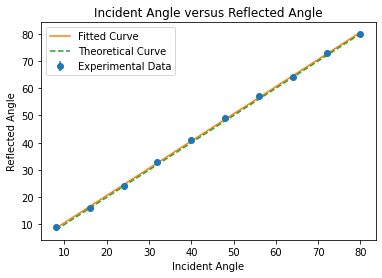

In [25]:
plt.errorbar(iAngle,rAngle, yerr=uncertainty, fmt='o', label='Experimental Data')
plt.xlabel('Incident Angle')
plt.ylabel('Reflected Angle')
plt.title('Incident Angle versus Reflected Angle')

plt.plot(x,f(x,a0,a1), label='Fitted Curve');
plt.plot(x,x,linestyle='dashed',label='Theoretical Curve')
plt.legend();
print('Fitted Linear Relation: {:.4f}'.format(a0))


Chi Squared: 4.775758
Reduced Chi Squared: 0.596970


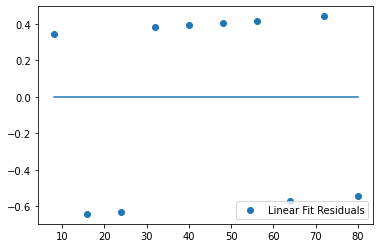

In [26]:
#Plotting Residuals / Finding Reduced Chi Squared
res = []
for i in range(len(iAngle)):
    res.append(rAngle[i] - f(iAngle[i],a0,a1))
res = np.array(res)

plt.scatter(iAngle,res,label='Linear Fit Residuals')
plt.plot(x, x*0)
plt.legend()

chi_s = np.sum(res[:]**2 / uncertainty)
rChi_s = chi_s / (10-2)
print("Chi Squared: {:.6f}".format(chi_s))
print("Reduced Chi Squared: {:.6f}".format(rChi_s))

Probably the best reduced chi squared value i've ever gotten, needless to say, an experimental fit of 0.999 and a reduced chi squared of 0.597 both suggest that our hypothesis is valid

### Experiment 2

#### Data Collection / Analysis

Glass Brick

In [35]:
sAngleG = np.array([167, 172, 173, 172, 171, 171, 172, 172, 172, 172]) #Ssouth
eAngleG = np.array([157, 152, 143, 132, 121, 161, 152, 142, 132, 122]) #SE
gapG = np.array([0.5, 0.9, 1.2, 2.4, 1.8, 0.5, 0.8, 1.4, 2.1, 2.7]) #centimeters
gUnc = 0.1 #should've done multiple mesurements to get a better uncertainty
gThickness = 1.82 #cm
tUnc = 0.005 #uncertainty in thickness calculation

In [28]:
#creating function to find n
def calcN(y, t, theta): #takes theta in degrees
    return np.sqrt(y*y + 4*t*t)/y*np.sin(theta / 180 * np.pi)

In [70]:
perp = np.mean(sAngleG)
perpErr = np.std(sAngleG, ddof=1)/np.sqrt(len(sAngleG))
aTheta = perpErr + 0.5 #error from finding perpendicular axis + measuring
print('Angle Uncertainty: {:.4f}'.format(aTheta))
iAngle = -1*(eAngleG - perp)
n = calcN(gapG, gThickness, iAngle)

Angle Uncertainty: 1.0207


In [30]:
avg = np.mean(n)
std = np.std(n, ddof = 1)
err = std / np.sqrt(len(n))
print('Mean n value: {:.2f}'.format(round(avg,2)))
print('Standard Deviation: {:.2f}'.format(round(std,2)))
print('Standard Error (Simple Formula): {:.2f}'.format(round(err,2)))
print('Accepted Value of n: 1.53 +/- 0.01')

Mean n value: 1.44
Standard Deviation: 0.22
Standard Error (Simple Formula): 0.07
Accepted Value of n: 1.53 +/- 0.01


In [83]:
#Calculating the proper error value
def errN(y, aY, t, aT, theta, aTheta): #takes theta in degrees
    z = y / np.sqrt(y*y + 4*t*t)
    t1 = (np.cos(theta / 180 * np.pi)*(aTheta/180*np.pi)/z)**2
    t2 = (4*t*np.sin(theta / 180 * np.pi)*z / (y*y*y))**2
    t3 = (t*aY)**2 + (y*aT)**2
    return np.sqrt(t1 + t2*t3)

In [85]:
gErr = errN(gapG, gUnc, gThickness, tUnc, iAngle, aTheta)
print(gErr)

[0.38050452 0.16096776 0.12472676 0.04185301 0.08180413 0.29050653
 0.20047154 0.09550064 0.05315078 0.03620673]


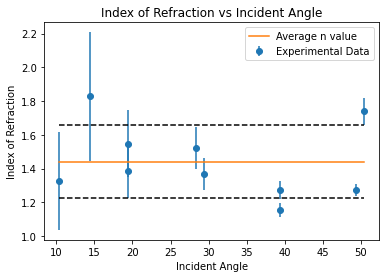

In [86]:
plt.errorbar(iAngle,n, yerr=gErr, fmt='o', label='Experimental Data')
plt.xlabel('Incident Angle')
plt.ylabel('Index of Refraction')
plt.title('Index of Refraction vs Incident Angle')

x = np.linspace(np.min(iAngle),np.max(iAngle),5)
plt.plot(x,x*0+avg, label='Average n value')
plt.plot(x,x*0+avg+std, color='black', linestyle='dashed')
plt.plot(x,x*0+avg-std, color='black', linestyle='dashed')
plt.legend();

In [90]:
#Performing agreement test
index = 3
test = np.abs(avg-1.53) > 2*np.sqrt(0.01**2 + gErr[index]**2)
print('The results agree with each other: {}'.format(test))

The results agree with each other: True


Plastic Brick

Angle Uncertainty: 0.8958
Mean n value: 1.56
Standard Deviation: 0.16
Standard Error (Simple Formula): 0.05
Accepted Value of n: 1.48 +/- 0.01
The results agree with each other: False


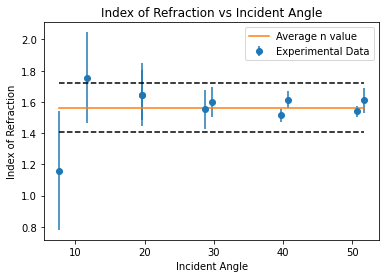

In [102]:
#Repeating calculations
sAngleP = np.array([159, 157, 158, 157, 155, 155, 157, 157, 156, 156])
eAngleP = np.array([149, 137, 128, 117, 105, 145, 137, 127, 116, 106])
gapP = np.array([0.5, 0.9, 1.4, 2.0, 2.4, 0.5, 0.9, 1.4, 1.9, 2.5])
pThickness = 2.15 #Thickness cm
tUnc = 0.005 #uncertainty in thickness calculation

perp = np.mean(sAngleP)
perpErr = np.std(sAngleP, ddof=1)/np.sqrt(len(sAngleP))
aTheta = perpErr + 0.5 #error from finding perpendicular axis + measuring
print('Angle Uncertainty: {:.4f}'.format(aTheta))
iAngle = -1*(eAngleP - perp)
n = calcN(gapP, pThickness, iAngle)

#Calculating statistical jazz
avg = np.mean(n)
std = np.std(n, ddof = 1)
err = std / np.sqrt(len(n))
print('Mean n value: {:.2f}'.format(round(avg,2)))
print('Standard Deviation: {:.2f}'.format(round(std,2)))
print('Standard Error (Simple Formula): {:.2f}'.format(round(err,2)))
print('Accepted Value of n: 1.48 +/- 0.01')

pErr = errN(gapG, gUnc, gThickness, tUnc, iAngle, aTheta)


#Plotting
plt.errorbar(iAngle,n, yerr=gErr, fmt='o', label='Experimental Data')
plt.xlabel('Incident Angle')
plt.ylabel('Index of Refraction')
plt.title('Index of Refraction vs Incident Angle')

x = np.linspace(np.min(iAngle),np.max(iAngle),5)
plt.plot(x,x*0+avg, label='Average n value')
plt.plot(x,x*0+avg+std, color='black', linestyle='dashed')
plt.plot(x,x*0+avg-std, color='black', linestyle='dashed')
plt.legend();

#Performing agreement test
index = 0
test = np.abs(avg-1.53) > 2*np.sqrt(0.01**2 + gErr[index]**2)
print('The results agree with each other: {}'.format(test))

### Experiment 3

#### Data Collection

3.1: Identifying Real and Virtual Images

In [2]:
#testing precision
f_pos = 25 #cm
lens_pos = 50 #cm
board_pos = [89.1, 89.2, 89.5, 89.4, 89.5]

In [3]:
lens_pos2 = 65.6 #cm
Fobject = 55 # cm
vImage = [41,36.5,36.4]

3.2: Images

In [4]:
#All measurements are in cm

#Measured with optical bench ticks
fPos= 25.0 
lensPos = 55.0 
boardPos = 86.7 

###Measured with callipers

#Real f object measurements
rFH = np.array([1.51, 1.50, 1.50]) #height
rFLA = np.array([0.78, 0.79, 0.78]) #long arm length
rFSA = np.array([0.49, 0.48, 0.52]) #short arm length
rFLW = np.array([0.09, 0.10, 0.10]) #width of long arm
rFSW = np.array([0.09, 0.10, 0.10]) #width of short arm
rFLS = np.array([0.62, 0.61, 0.61]) #gap between long and short arm 
rFSB = np.array([0.78, 0.79, 0.79]) #gap between short arm and base
rData = np.array([rFH, rFLA, rFSA, rFLW, rFSW, rFLS, rFSB])
rDim = np.empty(len(rData))
for i in range(len(rData)):
    rDim[i] = np.mean(rData[i])

#Projected image measurements
pFH = np.array([1.54, 1.60, 1.58]) #height
pFLA = np.array([0.89, 0.85, 0.86]) #long arm length
pFSA = np.array([0.51, 0.56, 0.54]) #short arm length
pFLW = np.array([0.11, 0.10, 0.10]) #width of long arm
pFSW = np.array([0.12, 0.09, 0.08]) #width of short arm
pFLS = np.array([0.63, 0.50, 0.56, 0.60, 0.60]) #gap between long and short arm
pFSB = np.array([0.75, 0.81, 0.75, 0.82, 0.80]) #gap between short arm and base 
pData = np.array([pFH, pFLA, pFSA, pFLW, pFSW, pFLS, pFSB], dtype=object)
pDim = np.empty(len(pData))
for i in range(len(pData)):
    pDim[i] = np.mean(pData[i])

#### Data Analysis

In [20]:
#Creating Theoretical Data
def magImg(hI, hO, dO):
    return -hI/hO*dO

def imgErr(hI, hIerr, hO, hOerr, dO, dOerr):
    t1 = dO*hI / (hO*hO) * hOerr
    t2 = -dO/hO * hIerr
    t3 = -hI/hO * dOerr
    return np.sqrt(t1*t1 + t2*t2 + t3*t3)

def magObj(hI, hO, dI):
    return -dI*hO/hI

#theoretical image distances
tID = np.empty(len(rDim))
tIDerr = np.empty(len(rDim))
for i in range(len(rDim)):
    tID[i] = magImg(pDim[i], rDim[i], lensPos-fPos)
    tIDerr[i] = imgErr(pDim[i], np.std(pData[i]), rDim[i], np.std(rData[i]), lensPos-fPos, .1)
#theoretical object distances
tOD = np.empty(len(rDim))
for i in range(len(rDim)):
    tOD[i] = magObj(pDim[i], rDim[i], boardPos-lensPos)

In [7]:
#fitting theoretical data
#y = -ax + b
#x = 1 / tOD
#y = 1 / tID

def g(x, a0):
    return -x + a0

par, cov = fitter.curve_fit(g, 1/tID, 1/tOD)

a0 = par[0]

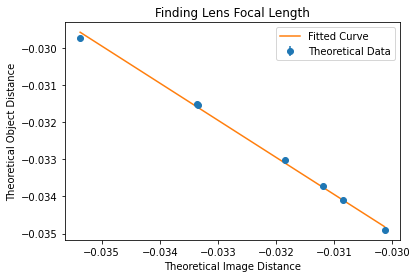

Fitted Focal Length: 15.40


In [8]:
x = np.linspace(min(1/tID), max(1/tID), 50)

plt.errorbar(1/tID,1/tOD, yerr=0, fmt='o', label='Theoretical Data')
plt.xlabel('Theoretical Image Distance')
plt.ylabel('Theoretical Object Distance')
plt.title('Finding Lens Focal Length')
plt.plot(x,g(x,a0), label='Fitted Curve');
plt.legend()
plt.show();
print('Fitted Focal Length: {:.2f}'.format(np.abs(1/a0)))

In [24]:
#calculating y uncertainty
m = 1
alphaY = np.sqrt((m*tIDerr)**2 + cov[0][0]**2)

In [34]:
#calculating b / b uncertainty
b = np.sum((1/tID)*alphaY + 1/tOD*alphaY / np.sum(alphaY))
alphaB = 1/np.sqrt(np.sum(alphaY))
b,alphaB

(-0.4872150422748924, 0.2685210043917005)

### Experiment 4

#### Data Collection

(option 1)

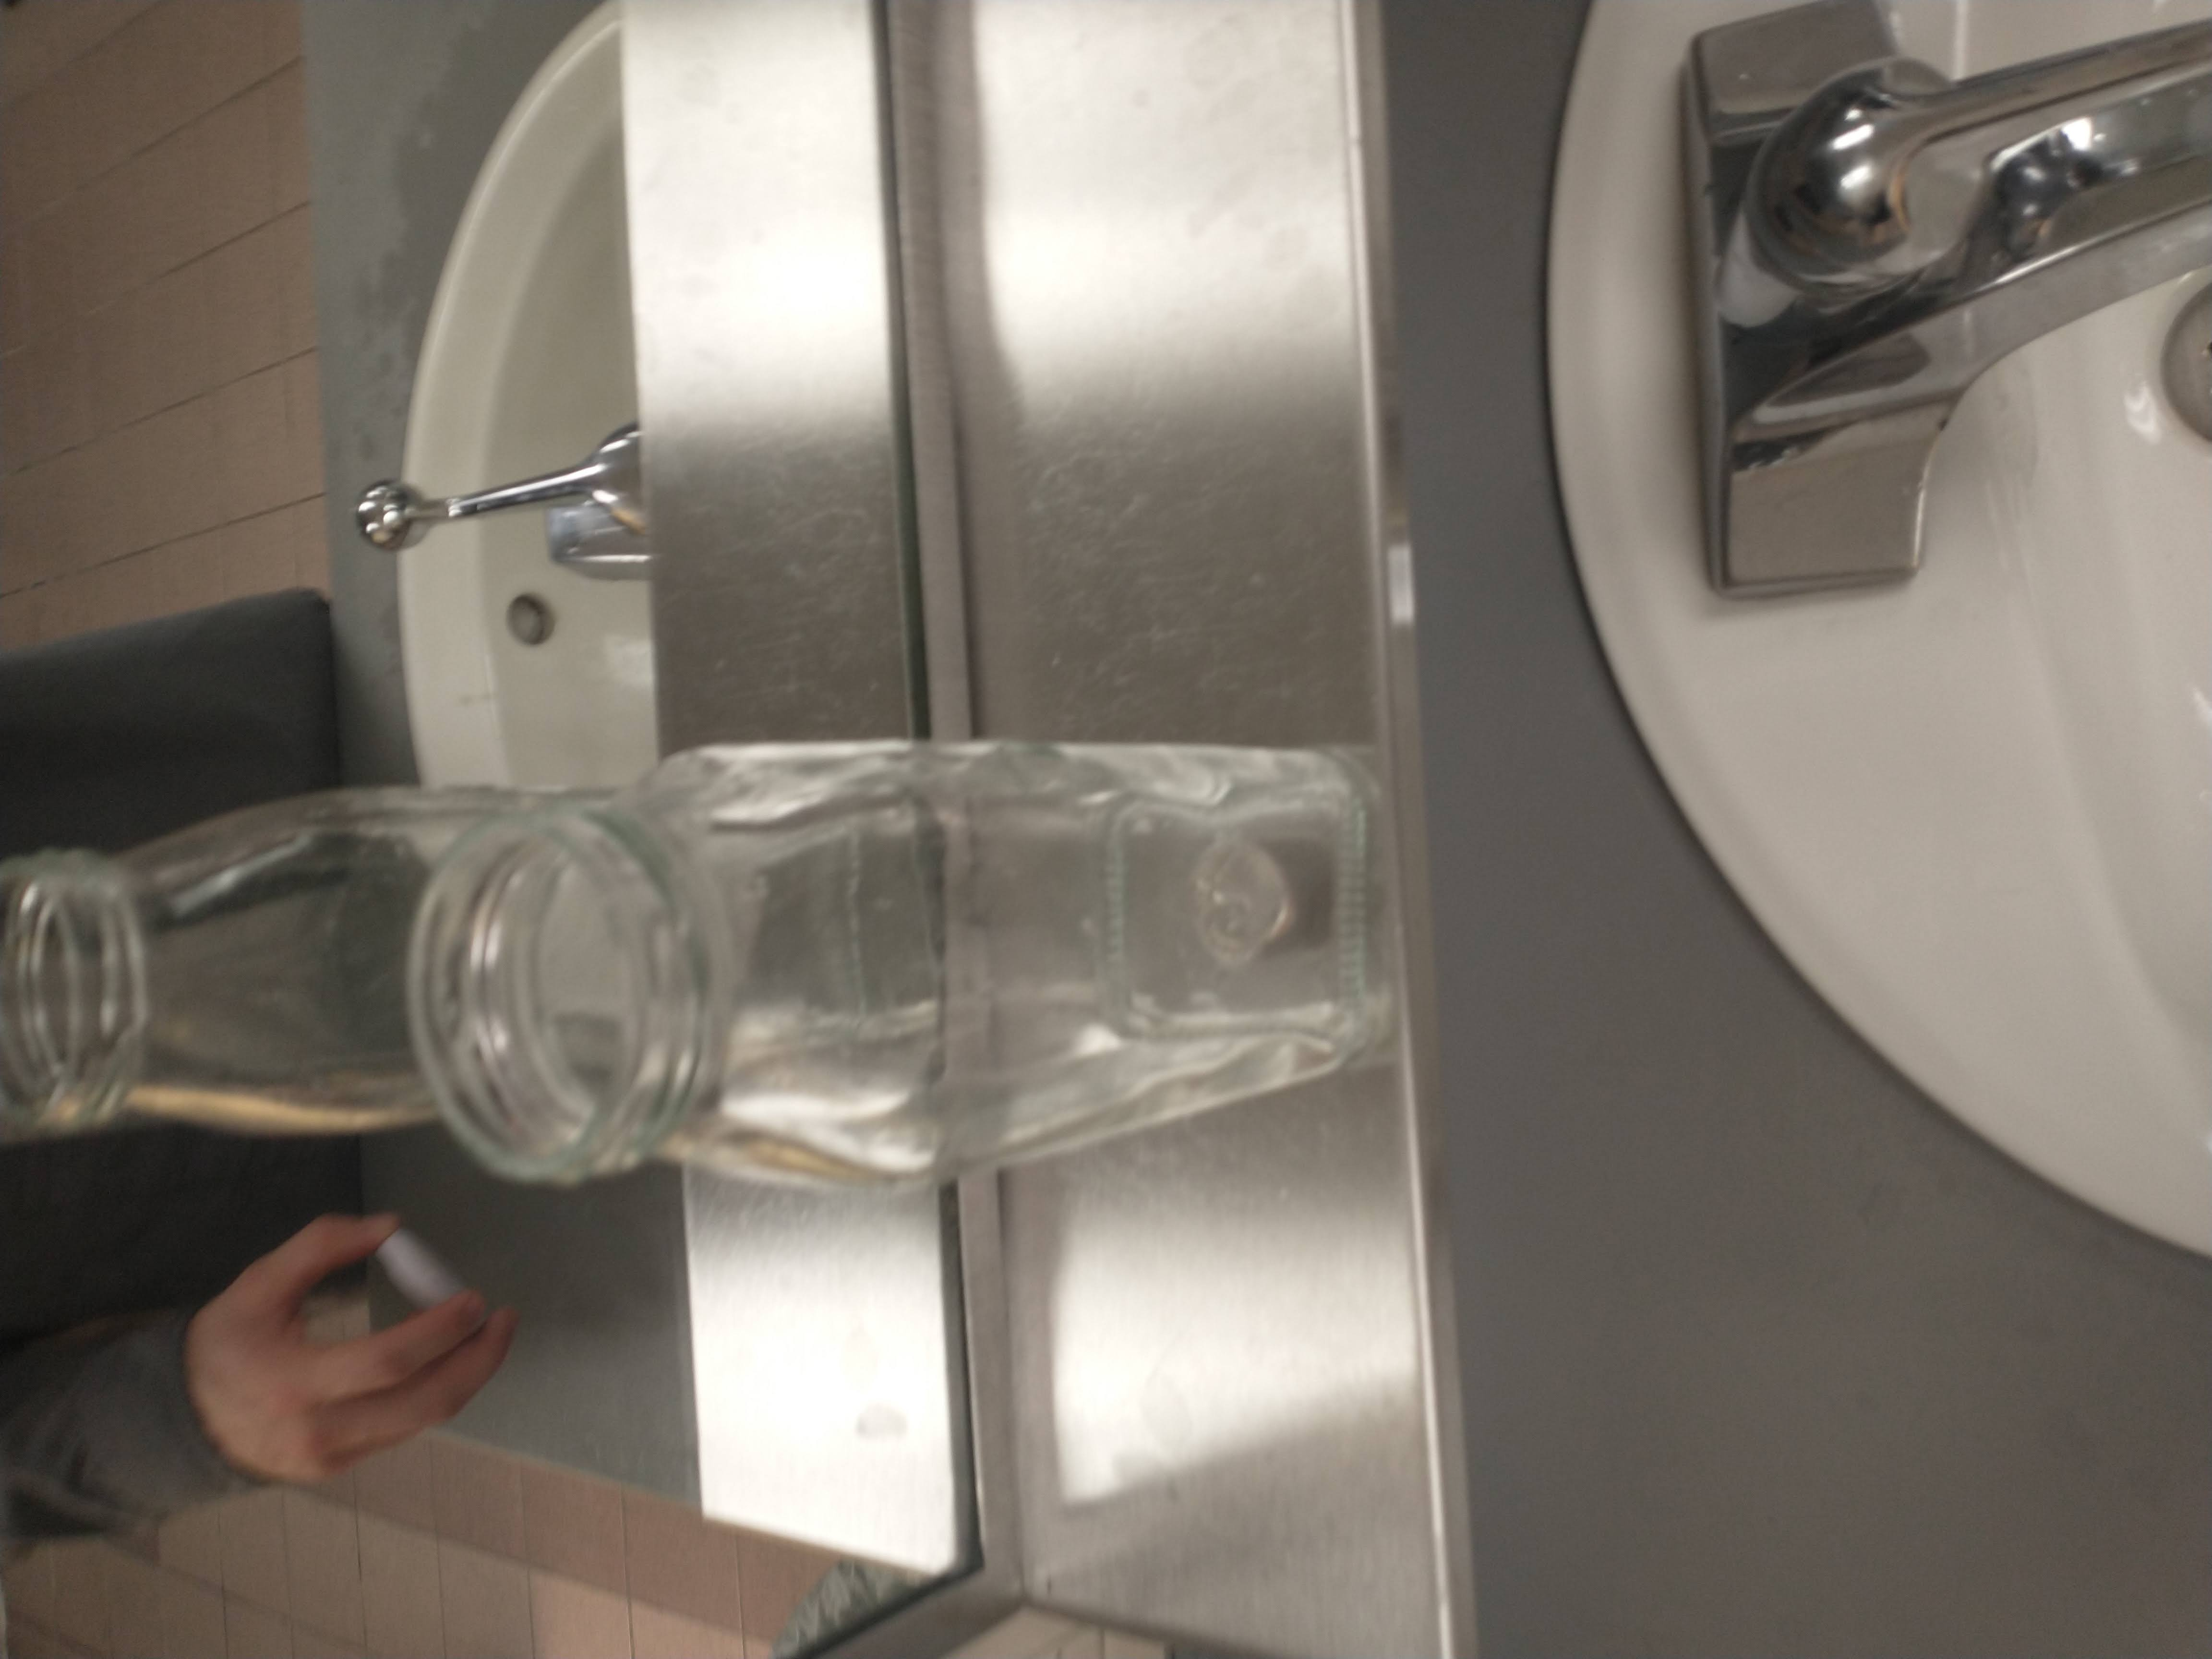

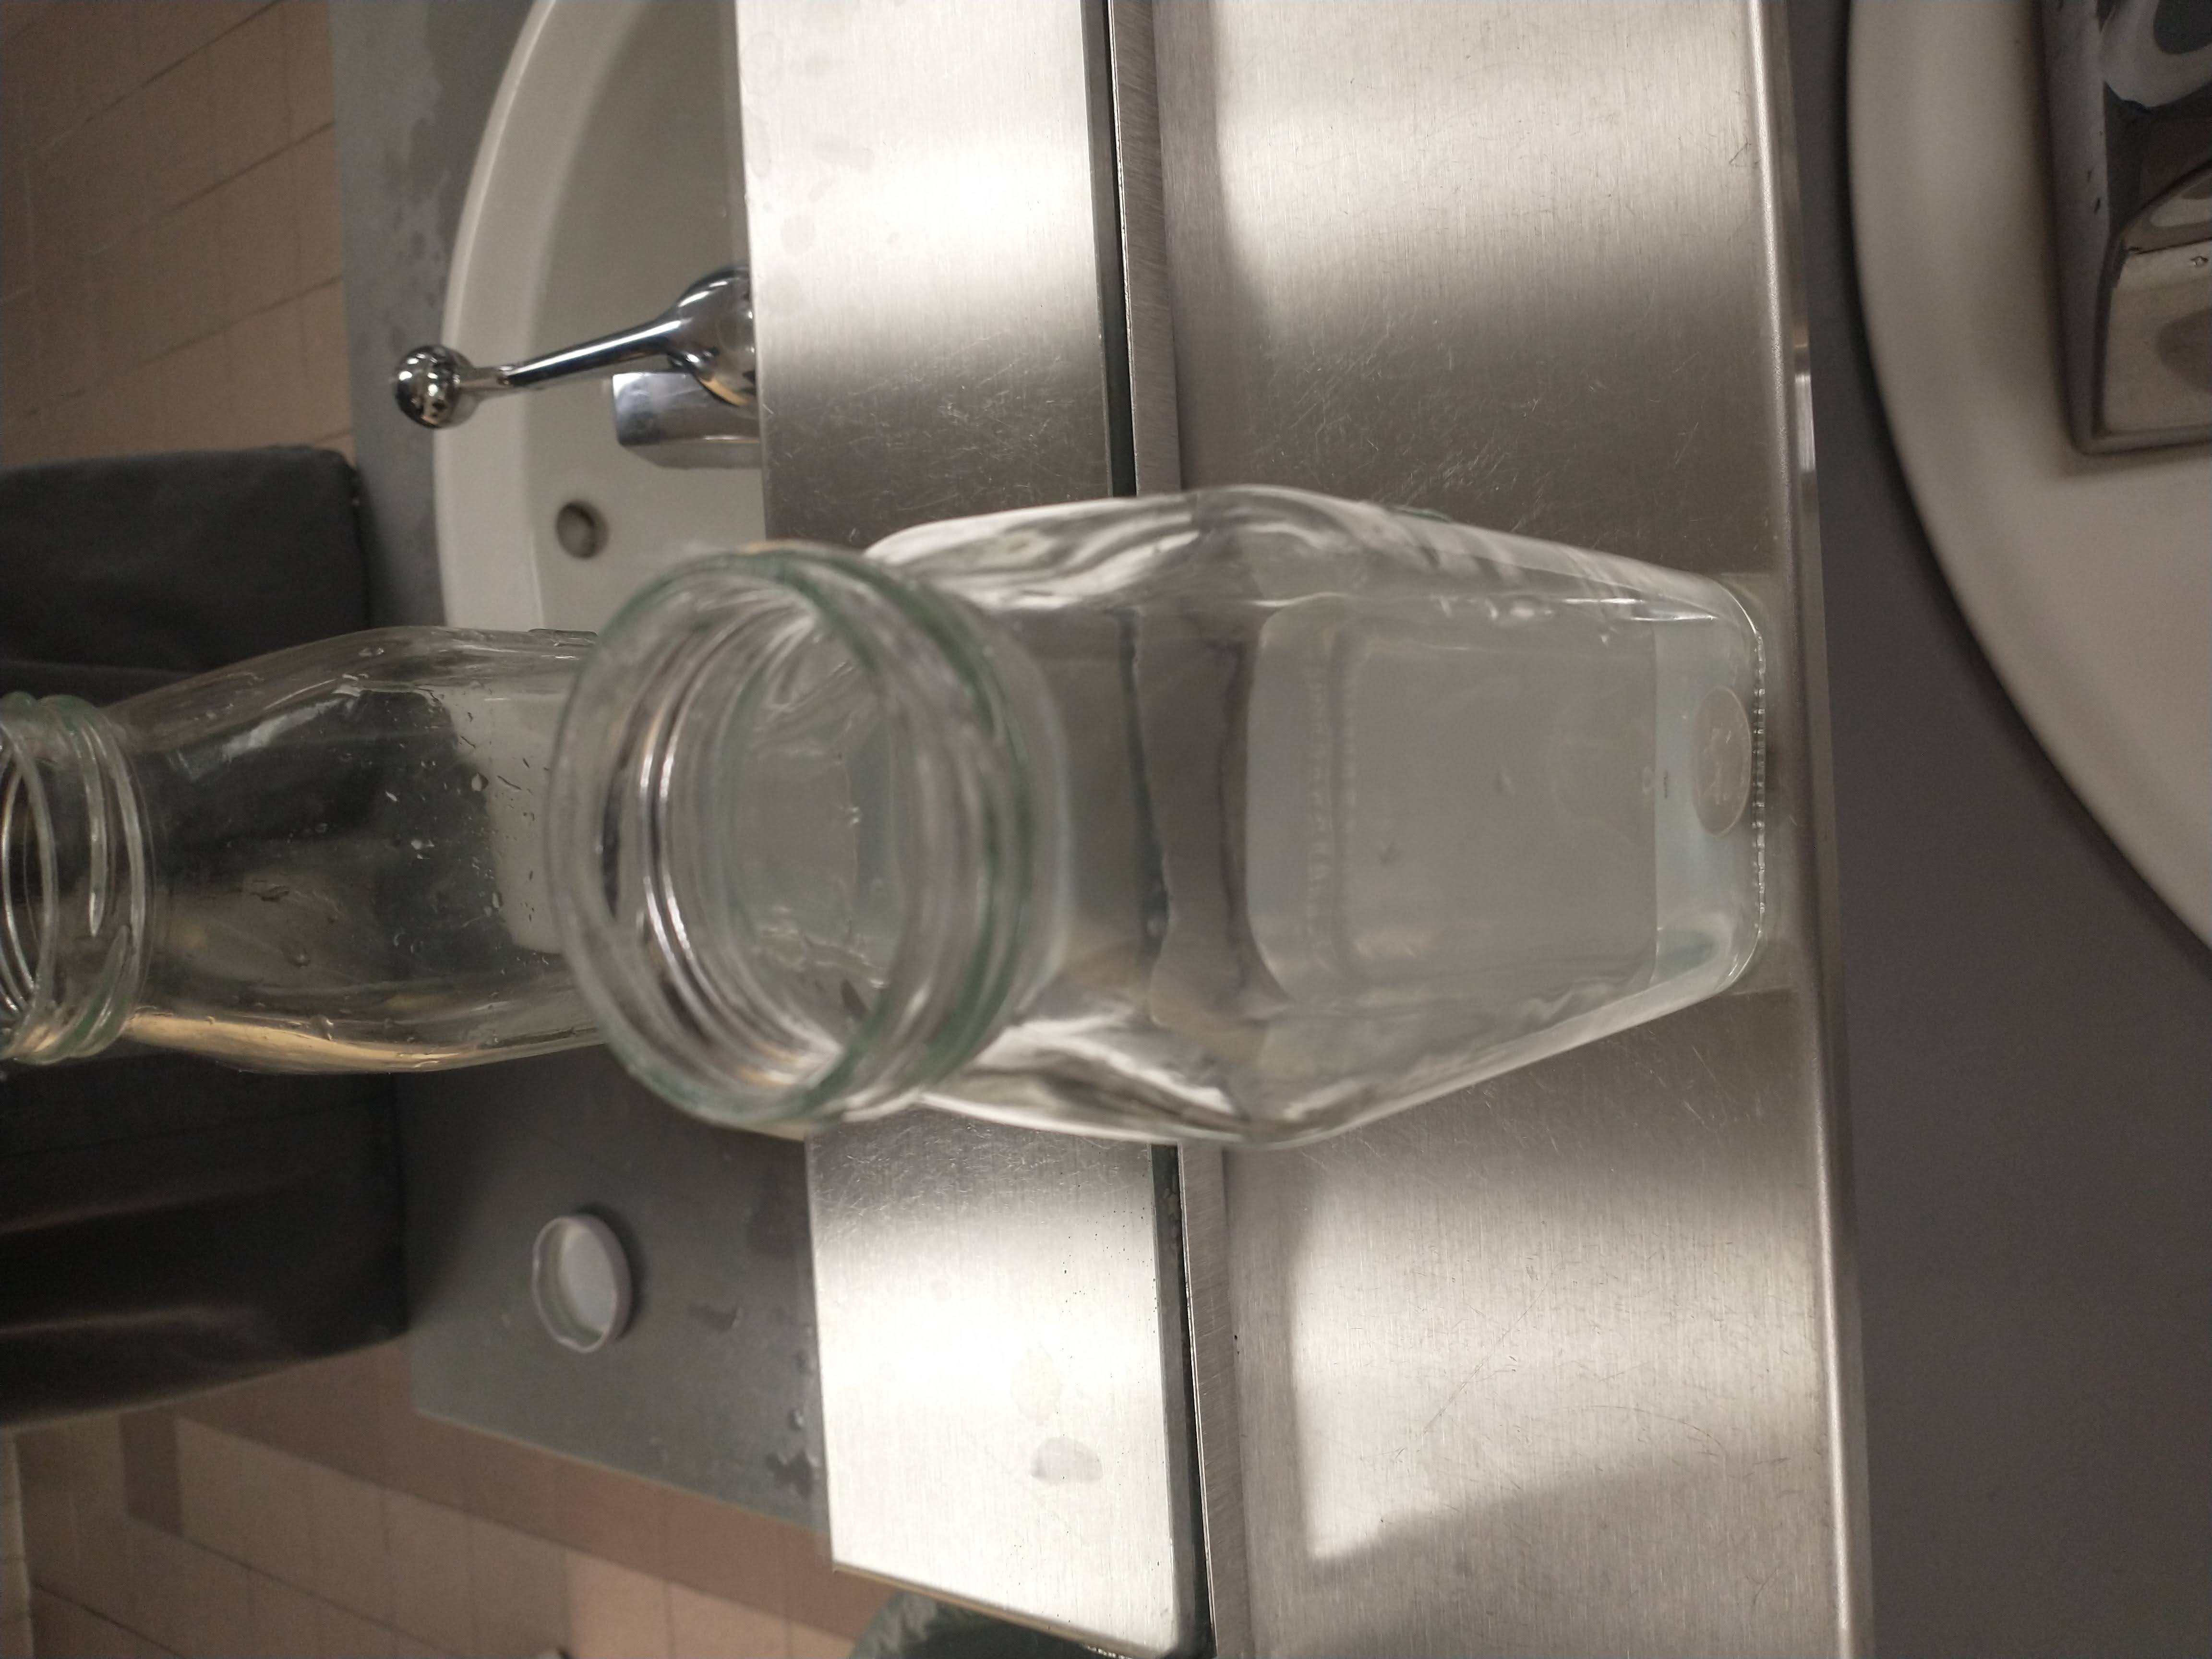

#### Data Analysis

In [39]:
# Apparent Distance = Real Distance / Refractive Index
aD = 1/4 #(approximate cursor measurement)
rD = 1/3 #(approximate cursor measurement)
mu = rD/aD
print('Supposed Refractive index {:.2f}'.format(mu))

Supposed Refractive index 1.33
